### 4.10 Part 1.25 Young Advanced Consumer
#### 1 - importing libraries
#### 2 - Importing df
#### 3 - Analyzing  by Loyalty Flag
#### 4 - Analyzing Purshases by Income
#### 5 - Analyzing by Busiest_day
#### 6 - Analyzing number by State
#### 7 - Analyzing by n_dependants
#### 8 - Analyzing Days since prior order
#### 9 - Defining TOP products for client group
#### 10 behavior of customers with 2 dependants

### 1 Importing libraries and df w/o PII

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path=r'C:\Users\user\07-2023 Instacart Basket Analysis\02 Data'

### 2 Importing df

In [3]:
df=pd.read_pickle(os.path.join(path,'Prepared Data','000YAC.pkl'))

In [4]:
df.columns

Index(['user_id', 'Gender', 'STATE', 'Age', 'date_joined', 'n_dependants',
       'fam_status', 'income', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'order_id', 'eval_set', 'order_number',
       'day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_day',
       'busiest days', 'max_order', 'loyalty_flag', 'mean_price',
       'spender_flag', 'median_days_sinse_ord', 'frequent_flag',
       'AgeIncome_flag'],
      dtype='object')

In [5]:
df.shape

(41694, 31)

In [6]:
df[['user_id','Age', 'income','product_id', 'order_number','mean_price']] .describe()

,user_id,Age,income,product_id,order_number,mean_price
count,41694.000000,41694.000000,41694.000000,41694.000000,41694.000000,41694.000000
mean,108275.024848,29.395812,306429.256919,25171.303617,17.791960,294.152158
std,57566.427034,6.537184,55693.850920,14336.069176,16.244927,542.550534
min,866.000000,18.000000,202542.000000,0.000000,1.000000,24.579249
25%,66704.000000,24.000000,257826.000000,13108.000000,6.000000,56.455500
50%,114001.000000,29.000000,312258.000000,25146.000000,12.000000,122.727073
75%,149828.000000,34.000000,354808.000000,37654.000000,26.000000,252.411475
max,204991.000000,40.000000,397929.000000,49683.000000,100.000000,4924.385246


### 3 -Analyzing Young  Advanced Consumer by Loyalty Flag

#### --creating the subset to avoid Memory Error

In [7]:
df1=df[['user_id','fam_status','loyalty_flag']]

In [8]:
df11=df1.drop_duplicates().reset_index()

In [9]:
df11

,index,user_id,fam_status,loyalty_flag
0,37454,15683,married,New customer
1,85262,89592,single,Loyal customer
2,104865,114462,married,Regular customer
3,145441,156042,married,Regular customer
4,203317,160502,married,Loyal customer
...,...,...,...,...
152,9004233,102904,married,New customer
153,9111539,202921,living with parents and siblings,Regular customer
154,9131113,114182,married,Loyal customer
155,9172386,183344,married,Regular customer


#### -analyzing Young   Advanced Consumer by Loyalty Flag and Family Status

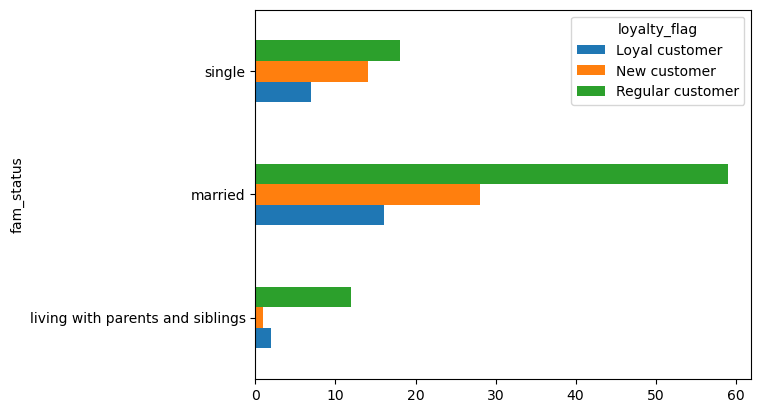

In [10]:
bar12=df11.groupby('fam_status')['loyalty_flag'].value_counts().unstack().plot.barh()

In [11]:
bar12.figure.savefig(os.path.join(path, 'Prepared Data', 'YAC_LoyaltyFlag.png'))

### 4 -analyzing Young   Advanced Consumer purshases by their income

In [12]:
df2=df[['prices', 'income']]

In [13]:
df2['prices'].sum()

12196199.4

In [14]:
df22=df2.groupby('income').agg(mean_purshase=('prices','mean'))

In [15]:
df22

,mean_purshase
income,
202542,293.570513
202820,155.878073
203653,362.088095
206182,36.624806
207493,134.870789
...,...
391967,255.054614
392552,61.662545
395360,129.548455


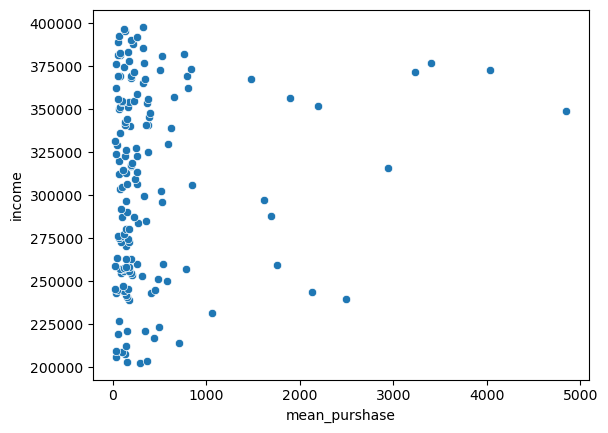

In [16]:
scat3=sns.scatterplot(x='mean_purshase', y='income', data=df22)

#### filter extrem big values

In [17]:
df22filtered=df22[df22['mean_purshase']<1500]

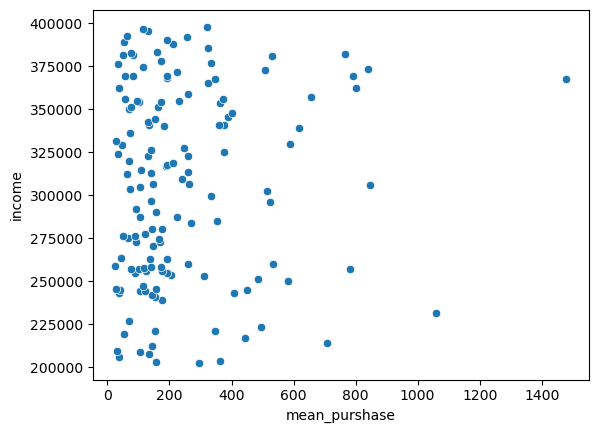

In [18]:
scat3=sns.scatterplot(x='mean_purshase', y='income', data=df22filtered)

In [19]:
scat3.figure.savefig(os.path.join(path, 'Prepared Data', 'YAC_PricesIncome.png'))

### 5 - Analyzing Young   Advanced Consumer by Busiest_day

In [20]:
df4=df[['user_id','STATE', 'busiest_day', 'day_of_week']]

In [21]:
df4

,user_id,STATE,busiest_day,day_of_week
37454,15683,New Mexico,Busiest days,0
37455,15683,New Mexico,Busiest days,0
37456,15683,New Mexico,Regularly days,2
37457,15683,New Mexico,Regularly days,5
37458,15683,New Mexico,Busiest days,0
...,...,...,...,...
10874333,137065,North Carolina,Regularly days,6
10874334,137065,North Carolina,Regularly days,5
10874335,137065,North Carolina,Regularly days,5
10874336,137065,North Carolina,Slowest days,3


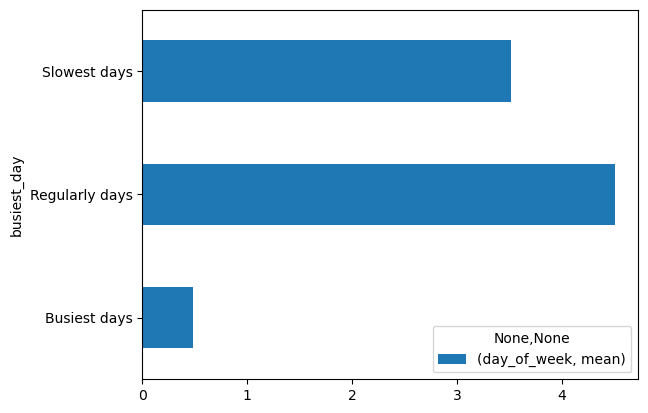

In [22]:
bar14=df4.groupby('busiest_day').agg({'day_of_week':['mean']}).plot.barh()

In [23]:
bar14.figure.savefig(os.path.join(path, 'Prepared Data', 'YAC_BusiestDayOfWeek.png'))

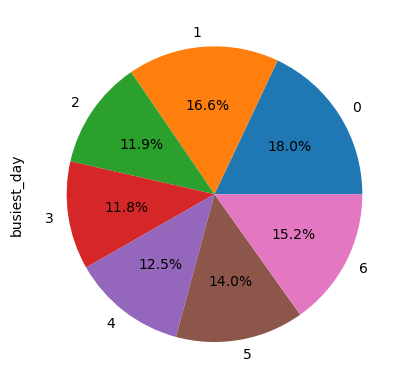

In [24]:
pie24=df4.groupby('day_of_week')['busiest_day'].count().plot(kind='pie', autopct='%0.01f%%')

In [25]:
df4.groupby('day_of_week')['busiest_day'].count()

day_of_week
0    7496
1    6904
2    4958
3    4934
4    5230
5    5850
6    6322
Name: busiest_day, dtype: int64

In [26]:
pie24.figure.savefig(os.path.join(path, 'Prepared Data', 'YAC_pieBusiestDayOfWeek.png'))

#### -prefered hour of day

In [27]:
df44=df[['order_hour_of_day','user_id']]

In [28]:
df44.groupby('order_hour_of_day')['user_id'].count()

order_hour_of_day
0      265
1       28
2      157
3       48
4       68
5      193
6      237
7     1407
8     2695
9     3654
10    4365
11    4045
12    3395
13    2970
14    3233
15    3414
16    3564
17    2303
18    1688
19    1355
20    1253
21     621
22     521
23     215
Name: user_id, dtype: int64

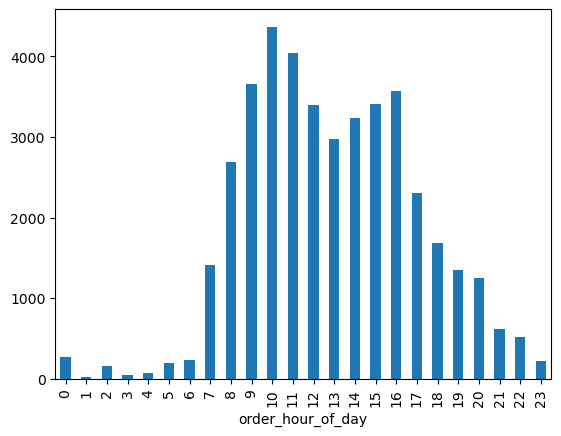

In [29]:
bar44=df44.groupby('order_hour_of_day')['user_id'].count().plot.bar()

In [30]:
bar44.figure.savefig(os.path.join(path, 'Prepared Data', 'YAC_BusiestHourOfDay.png'))

### 6 - Analyzing number of Young  Advanced Consumers by State

In [4]:
df5=df[['user_id','STATE']]

In [5]:
DF5=df5.drop_duplicates().reset_index()

In [33]:
DF5

,index,user_id,STATE
0,37454,15683,New Mexico
1,85262,89592,Minnesota
2,104865,114462,Kentucky
3,145441,156042,Maryland
4,203317,160502,California
...,...,...,...
152,9004233,102904,Mississippi
153,9111539,202921,Tennessee
154,9131113,114182,Texas
155,9172386,183344,Wisconsin


#### number of rows indicate total number of YAC =157

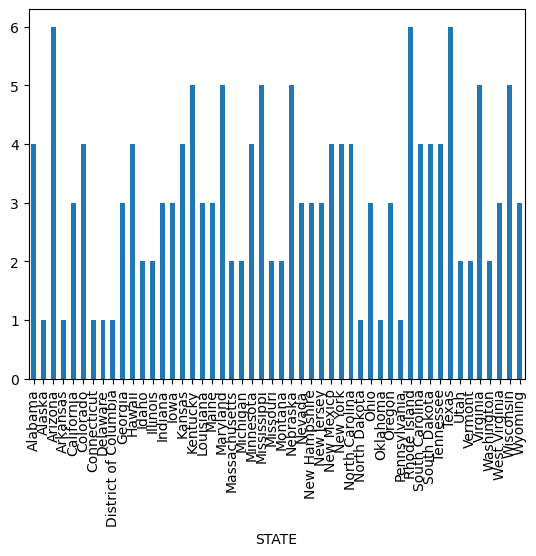

In [34]:
bar15=DF5.groupby('STATE')['user_id'].count().plot.bar()

In [6]:
DF5.groupby('STATE')['user_id'].count()

STATE
Alabama                 4
Alaska                  1
Arizona                 6
Arkansas                1
California              3
Colorado                4
Connecticut             1
Delaware                1
District of Columbia    1
Georgia                 3
Hawaii                  4
Idaho                   2
Illinois                2
Indiana                 3
Iowa                    3
Kansas                  4
Kentucky                5
Louisiana               3
Maine                   3
Maryland                5
Massachusetts           2
Michigan                2
Minnesota               4
Mississippi             5
Missouri                2
Montana                 2
Nebraska                5
Nevada                  3
New Hampshire           3
New Jersey              3
New Mexico              4
New York                4
North Carolina          4
North Dakota            1
Ohio                    3
Oklahoma                1
Oregon                  3
Pennsylvania            1
Rhode 

#### -defining 10 Top States

In [35]:
DF5.groupby('STATE')['user_id'].count().sort_values(ascending=False).head(10)

STATE
Arizona         6
Texas           6
Rhode Island    6
Nebraska        5
Wisconsin       5
Maryland        5
Virginia        5
Kentucky        5
Mississippi     5
Alabama         4
Name: user_id, dtype: int64

#### -saving the plot

In [36]:
bar15.figure.savefig(os.path.join(path, 'Prepared Data', 'YAC_UsersNumberState.png'))

### 7 - Analyzing Young   Advanced Consumer  by n_dependants

In [37]:
df6=df[['user_id', 'n_dependants']]

In [38]:
DF6=df6.drop_duplicates()

In [39]:
DF6.groupby(['n_dependants'])['user_id'].count()

n_dependants
0    39
1    42
2    46
3    30
Name: user_id, dtype: int64

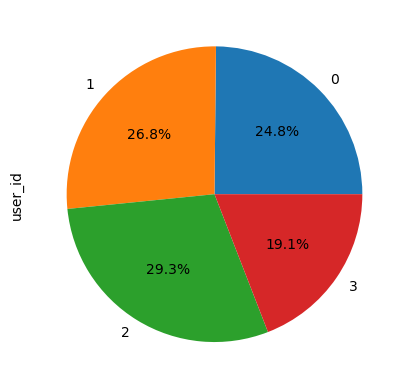

In [40]:
pie16=DF6.groupby(['n_dependants'])['user_id'].count().plot(kind='pie', autopct='%0.01f%%')

In [41]:
DF6

,user_id,n_dependants
37454,15683,1
85262,89592,0
104865,114462,2
145441,156042,3
203317,160502,1
...,...,...
9004233,102904,1
9111539,202921,1
9131113,114182,3
9172386,183344,3


#### saving the plot

In [42]:
pie16.figure.savefig(os.path.join(path, 'Prepared Data', 'YAC_NDependansUsers.png'))

### 8 - Analyzing Days since prior order

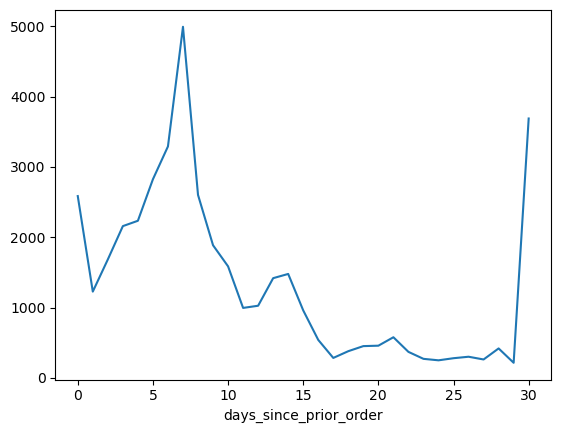

In [43]:
line17=df.groupby('days_since_prior_order')['days_since_prior_order'].count().plot(kind='line')

In [44]:
df.groupby('days_since_prior_order')['days_since_prior_order'].count()

days_since_prior_order
0     2585
1     1227
2     1684
3     2158
4     2234
5     2824
6     3291
7     4992
8     2602
9     1886
10    1586
11     995
12    1026
13    1418
14    1478
15     960
16     540
17     284
18     380
19     452
20     458
21     578
22     370
23     271
24     250
25     280
26     301
27     262
28     419
29     215
30    3688
Name: days_since_prior_order, dtype: int64

In [45]:
line17.figure.savefig(os.path.join(path, 'Prepared Data', 'YAC_DaysSincePriorOrder.png'))

### 9- Defining TOP products for client group


 #### creating subset

In [46]:
df18=df[['product_name','product_id','prices']]

In [47]:
df18

,product_name,product_id,prices
37454,Beef Broth,3689,12.9
37455,Yellow Onions,4605,1.2
37456,Rice Vinegar,8069,5.8
37457,Original Nooks & Crannies English Muffins,10673,6.7
37458,Hydroponic Bibb Lettuce,14671,9.2
...,...,...,...
10874333,2% Reduced Fat Milk,23909,9.2
10874334,Philadelphia Original Cream Cheese,36086,7.0
10874335,Natural Medium Cheddar Cheese,15269,11.4
10874336,Organic Yellow Onion,22935,1.4


#### identifying the most populare products counting orders rows  and selecting 10 TOP 

In [48]:
DF18=df18.groupby('product_name')['prices'].count().sort_values( ascending=False).reset_index().head(11)

In [49]:
DF18

,product_name,prices
0,Banana,454
1,Lowfat 2% Milkfat Cottage Cheese,381
2,Bag of Organic Bananas,320
3,2% Reduced Fat Milk,222
4,Blueberries,197
5,100% Whole Wheat Bread,194
6,,174
7,Organic Fuji Apple,173
8,Roma Tomato,163
9,Organic Raspberries,159


In [50]:
DF18=DF18.rename(columns={'prices':'count_orders'})

In [51]:
DF18=DF18.drop(index=6)

#### -creating plot

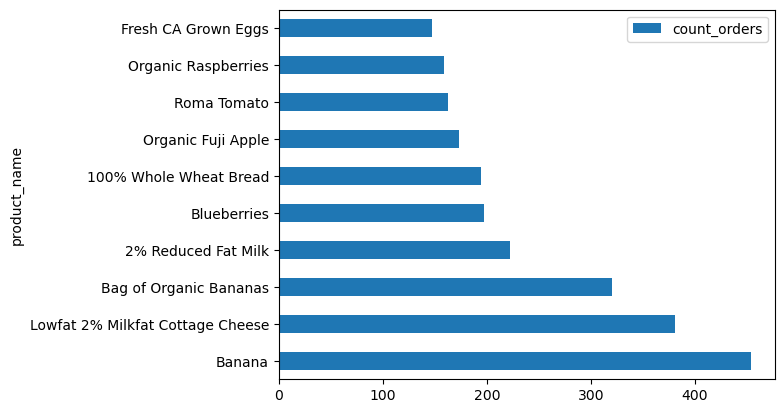

In [52]:
Bar21=DF18.plot.barh(x='product_name')

#### -saving the plot

In [53]:
Bar21.figure.savefig(os.path.join(path, 'Prepared Data', 'YAC_Products.png'))

### 10 behavior of customers with 2 dependants

In [4]:
DF_2dep=df.loc[df['n_dependants']==2]

In [5]:
DF_2dep[['user_id','department_id','prices','order_number','day_of_week', 
         'order_hour_of_day','days_since_prior_order','max_order','mean_price' ]].describe()

,user_id,department_id,prices,order_number,day_of_week,order_hour_of_day,days_since_prior_order,max_order,mean_price
count,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000
mean,104831.446714,10.006220,501.645319,17.419818,2.765843,12.920659,11.138679,33.863843,503.957524
std,57044.561213,6.250948,5976.700226,16.561768,2.191083,3.806900,8.804724,23.081550,748.634975
min,866.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,6.000000,24.579249
25%,50764.000000,4.000000,4.300000,5.000000,1.000000,10.000000,5.000000,13.000000,61.887591
50%,113384.000000,9.000000,7.300000,12.000000,2.000000,13.000000,8.000000,30.000000,131.433333
75%,159443.000000,16.000000,11.300000,25.000000,5.000000,16.000000,15.000000,50.000000,592.561275
max,202628.000000,21.000000,99999.000000,100.000000,6.000000,23.000000,30.000000,100.000000,4060.500676
